### About Dataset
- Context
- Melbourne real estate is BOOMING. Can you find the insight or predict the next big trend to become a real estate mogul… or       even harder, to snap up a reasonably priced 2-bedroom unit?

- Content
- This is a snapshot of a dataset created by Tony Pino.

- It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### Notes on Specific Variables
- Rooms: Number of rooms

- Price: Price in dollars

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bedroom2 : Scraped # of Bedrooms (from different source)

- Bathroom: Number of Bathrooms

- Car: Number of carspots

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

In [159]:
from google.colab import drive


In [160]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Call Data**

In [162]:
df=pd.read_csv('/content/drive/MyDrive/regression/data/melb_data.csv',sep=',')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


**Describe Data**

In [163]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**Known duplicated**

In [164]:
df.duplicated().sum()

0

**Get Feature**

In [165]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [166]:
df.select_dtypes(include=['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [167]:
df.select_dtypes(include=['number']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

**Get Information about Data**

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

**Data visualization**

In [169]:
for i in df.columns:
    print('-'*40)
    print(i)
    print(df[i].value_counts())
    print('*'*40)


----------------------------------------
Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64
****************************************
----------------------------------------
Address
36 Aberfeldie St    3
2 Bruce St          3
5 Charles St        3
53 William St       3
14 Arthur St        3
                   ..
16 Alleford St      1
2/1073 Centre Rd    1
14 Columbia St      1
21 Hardy Ct         1
6 Agnes St          1
Name: Address, Length: 13378, dtype: int64
****************************************
----------------------------------------
Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64
****************************************
----------------------------------------


<Axes: xlabel='Type', ylabel='Price'>

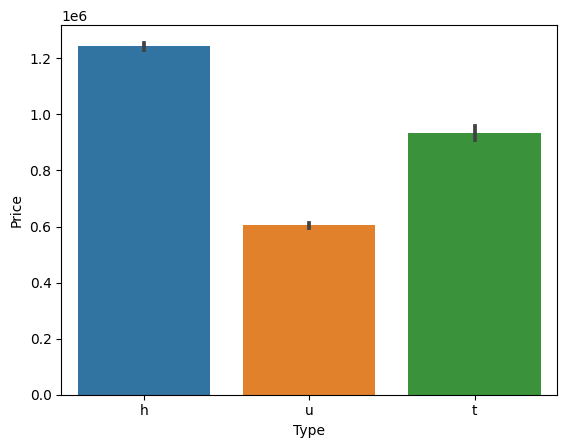

In [170]:
sns.barplot(x='Type', y='Price', data=df)

<Axes: xlabel='Method', ylabel='Price'>

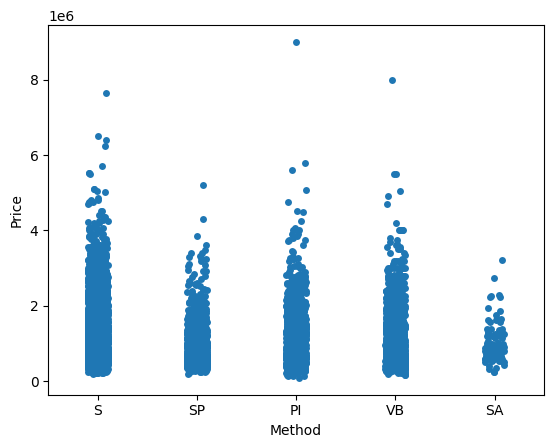

In [171]:
sns.stripplot(x="Method", y="Price", data=df)

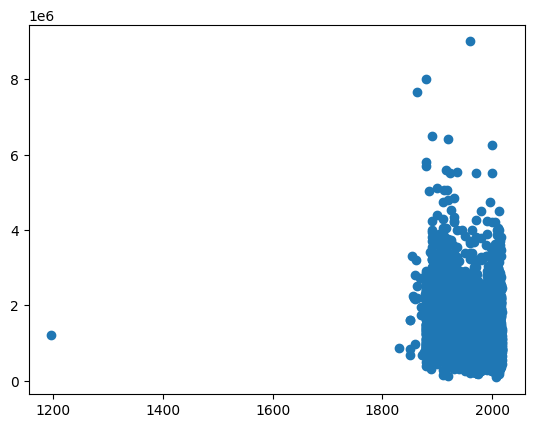

In [172]:
plt.scatter(x=df['YearBuilt'],y=df['Price'])

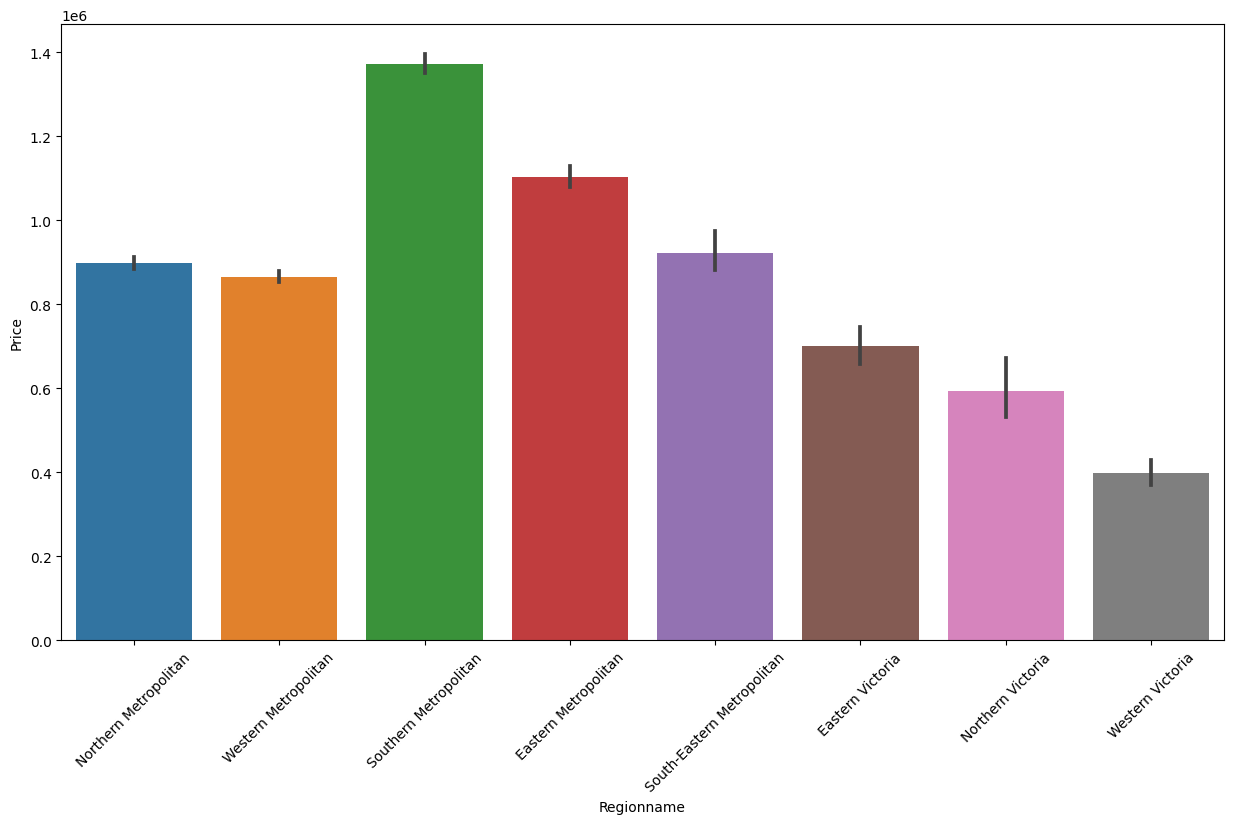

In [173]:
plt.figure(figsize=(15,8))
graph =sns.barplot(x="Regionname", y="Price", data=df)## , hue="Regionname"
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
plt.show()

<Axes: xlabel='Rooms', ylabel='Price'>

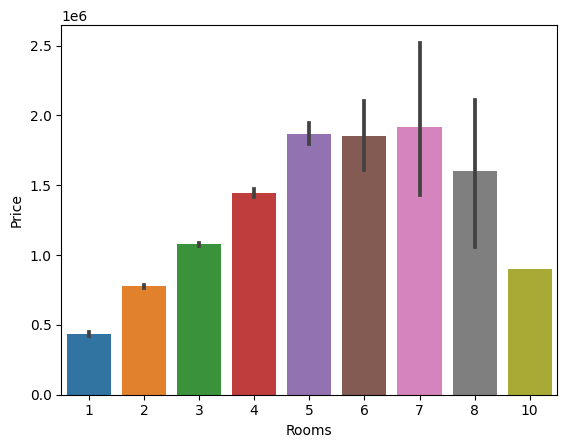

In [174]:
sns.barplot(x='Rooms', y='Price', data=df)

<Axes: xlabel='Bedroom2', ylabel='Price'>

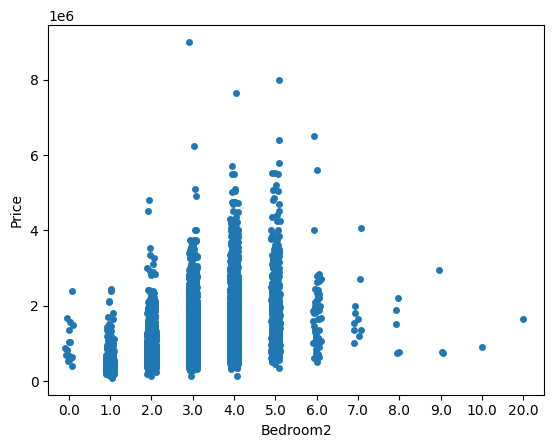

In [175]:
sns.stripplot(x="Bedroom2", y="Price", data=df)

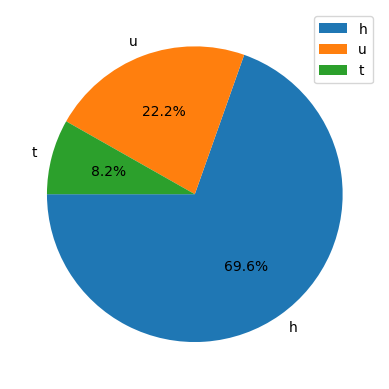

In [176]:
genderData=df['Type'].value_counts()
lable=df['Type'].value_counts().keys()
plt.pie(genderData,labels=lable,startangle=180 ,autopct='%1.1f%%')
plt.legend()
plt.show()

<Axes: xlabel='Bathroom', ylabel='Price'>

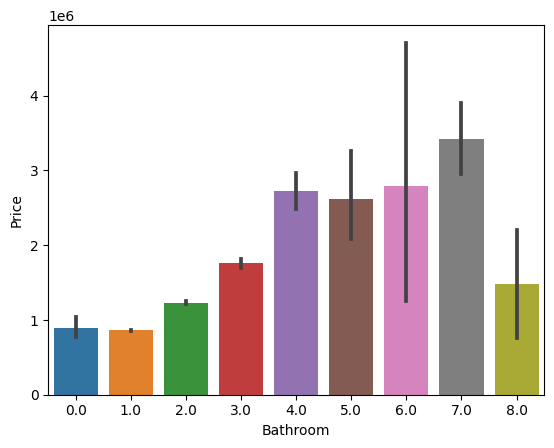

In [177]:
sns.barplot(x='Bathroom', y='Price', data=df)

<Axes: xlabel='Car', ylabel='Price'>

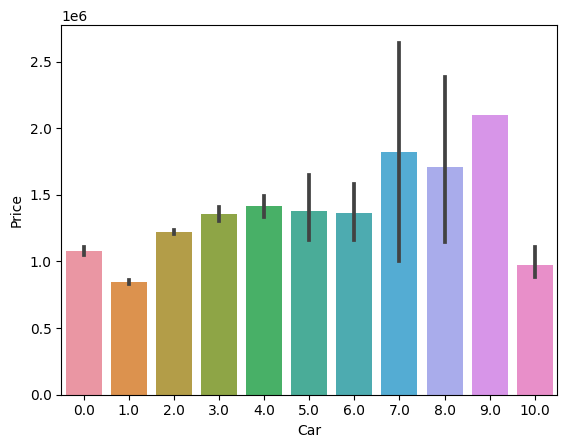

In [178]:
sns.barplot(x='Car', y='Price', data=df)

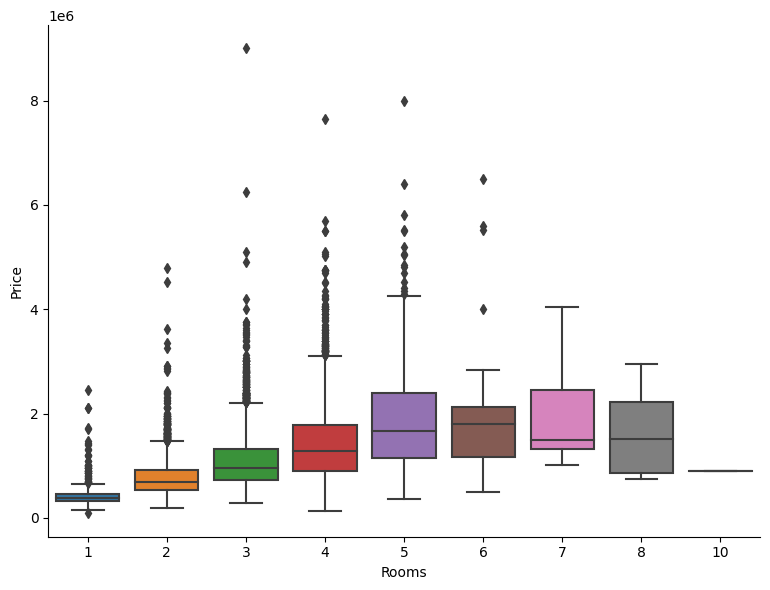

In [179]:
sns.catplot(x="Rooms", y="Price", kind="box", data=df, height=6, aspect=1.3)

**Use plotly for latge valves for feature**

In [180]:
import plotly.express as px

In [181]:
fig = px.scatter(df, x="BuildingArea", y="Price", color="Rooms")
fig.show()

In [182]:
fig = px.scatter(df, x="YearBuilt", y="Price", color="Rooms")
fig.show()

In [183]:
fig = px.bar(df,x='SellerG',y='Price',color='Rooms')
fig.show()

In [184]:
fig = px.scatter_3d(df,
                    x='Price',
                    y='Bathroom',
                    z='Rooms',
                    color='Rooms')
fig.show()

**Data preprocessing**

**Detecte Outlier**

In [185]:
dfg=df.copy()

<Axes: xlabel='Rooms'>

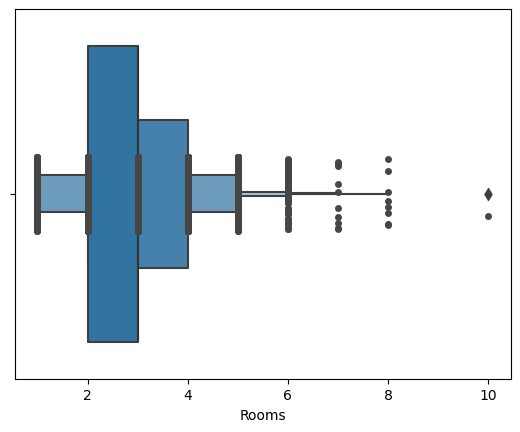

In [186]:
sns.boxenplot(x=dfg['Rooms'])
sns.stripplot(x='Rooms', data=dfg, color="#474646")

**Detect and Handle Outliers with Statistical methods.**
##### Z Score

- The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (Wikipedia).


In [187]:
## iit is good for floating data
# q1=df['Rooms'].quantile(.25)
# q3=df['Rooms'].quantile(.75)
# iqr=q3-q1
# ll=q1-iqr*1.5
# ul=q3+iqr*1.5
# df.loc[df['Rooms']<ll,'Rooms']=ll
# df.loc[df['Rooms']>ul,'Rooms']=ul


**Outlier Handling via Removing**

In [188]:
dfg=dfg[dfg['Rooms']<8]


<Axes: xlabel='Bedroom2'>

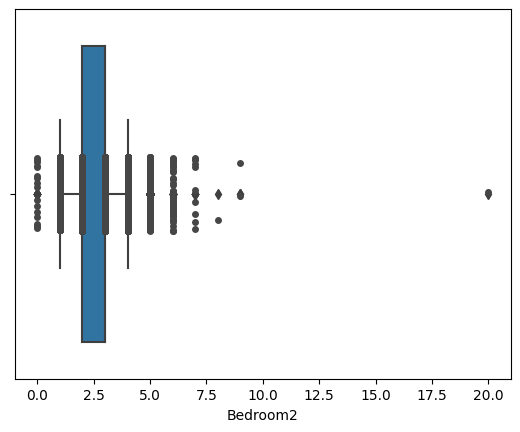

In [189]:
sns.boxplot(x=dfg['Bedroom2'])
sns.stripplot(x='Bedroom2', data=dfg, color="#474646")

In [190]:
# !pip install datasist

In [191]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(dfg, 0,dfg[['Bedroom2']])
len(outliers_indices)

647

In [192]:
## handle outlier outmaticaly
## Remove outlier
dfg.drop(outliers_indices, inplace=True)

<Axes: xlabel='Bathroom'>

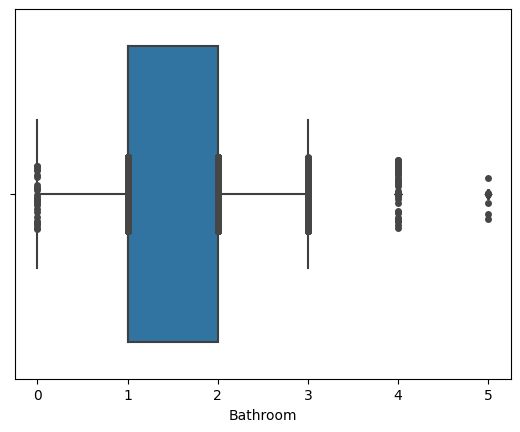

In [193]:
sns.boxplot(x=dfg['Bathroom'])
sns.stripplot(x='Bathroom', data=dfg, color="#474646")

In [194]:
outliers_indices = detect_outliers(dfg, 0,dfg[['Bathroom']])
len(outliers_indices)
dfg.drop(outliers_indices, inplace=True)

<Axes: xlabel='Car'>

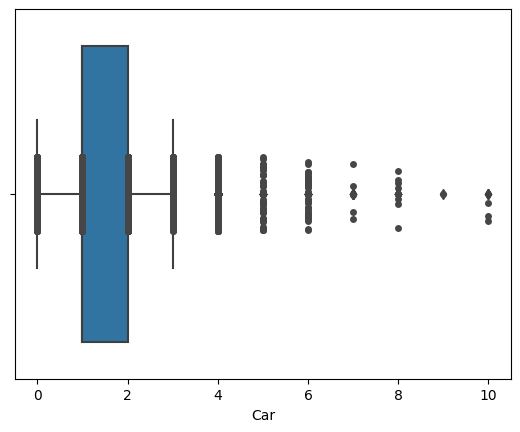

In [195]:
sns.boxplot(x=dfg['Car'])
sns.stripplot(x='Car', data=dfg, color="#474646")

In [196]:
dfg=dfg[dfg['Car']<6]

<Axes: xlabel='BuildingArea'>

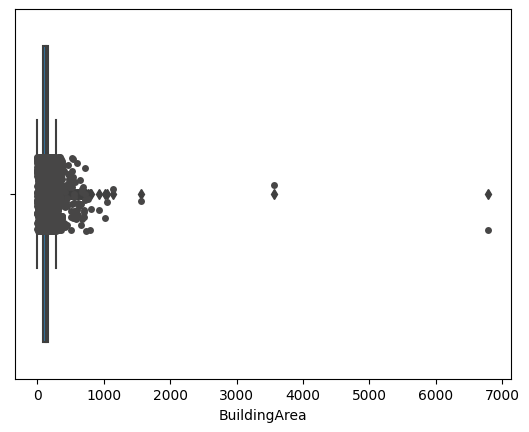

In [197]:
sns.boxplot(x=dfg['BuildingArea'])
sns.stripplot(x='BuildingArea', data=dfg, color="#474646")

In [198]:
dfg.shape

(12747, 21)

In [199]:
dfg=dfg[dfg['BuildingArea']<2000]

In [200]:
dfg.shape

(6655, 21)

<Axes: xlabel='YearBuilt'>

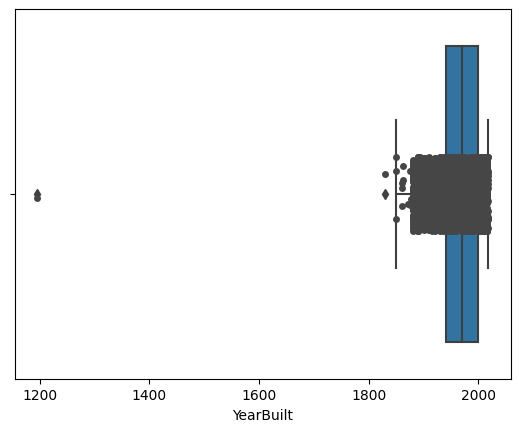

In [201]:
sns.boxplot(x=dfg['YearBuilt'])
sns.stripplot(x='YearBuilt', data=dfg, color="#474646")

In [202]:
dfg=dfg[dfg['YearBuilt']>1800]

In [203]:
dfg.shape

(6409, 21)

**Deal with missing values**

In [204]:
dfg.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea      571
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [205]:
dfg

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,h,650000.0,PI,Morrison,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,NaN,-37.70657,145.07878,Northern Metropolitan,2329.0
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [206]:
dfg['CouncilArea'].mode()

0    Moreland
Name: CouncilArea, dtype: object

In [207]:
dfg['CouncilArea'].mode()[0]

'Moreland'

In [208]:
dfg['CouncilArea'].fillna(dfg['CouncilArea'].mode()[0],inplace=True)

In [209]:

dfg.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

**Work with Nominal Features with pandas get_dummies method.**

- Nominal features are categorical features that have no numerical importance. Order does not matter.

In [210]:
# df = pd.get_dummies(df, columns=['Contract'], drop_first=False)
dfg = pd.get_dummies(dfg, columns=['Type', 'Method', 'Regionname'], drop_first=True)

In [211]:

dfg

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,0,1,0,0,1,0,0,0,0,0
4,Abbotsford,55a Park St,4,1600000.0,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,0,0,1,0,1,0,0,0,0,0
6,Abbotsford,124 Yarra St,3,1876000.0,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,...,0,0,0,0,1,0,0,0,0,0
7,Abbotsford,98 Charles St,2,1636000.0,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,Watsonia,76 Kenmare St,2,650000.0,Morrison,26/08/2017,14.5,3087.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
13573,Werribee,5 Nuragi Ct,4,635000.0,hockingstuart,26/08/2017,14.7,3030.0,4.0,2.0,...,0,0,0,0,0,0,0,0,1,0
13576,Williamstown,77 Merrett Dr,3,1031000.0,Williams,26/08/2017,6.8,3016.0,3.0,2.0,...,0,1,0,0,0,0,0,0,1,0
13578,Williamstown,96 Verdon St,4,2500000.0,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [212]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 1 to 13579
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 6409 non-null   object 
 1   Address                                6409 non-null   object 
 2   Rooms                                  6409 non-null   int64  
 3   Price                                  6409 non-null   float64
 4   SellerG                                6409 non-null   object 
 5   Date                                   6409 non-null   object 
 6   Distance                               6409 non-null   float64
 7   Postcode                               6409 non-null   float64
 8   Bedroom2                               6409 non-null   float64
 9   Bathroom                               6409 non-null   float64
 10  Car                                    6409 non-null   float64
 11  Lan

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [214]:
dfg['Suburb'] = le.fit_transform(dfg['Suburb'])
dfg['Address'] = le.fit_transform(dfg['Address'])
dfg['SellerG'] = le.fit_transform(dfg['SellerG'])
dfg['CouncilArea'] = le.fit_transform(dfg['CouncilArea'])

In [215]:
dfg['Date'] = pd.to_datetime(dfg['Date'])
dfg['yearOfSale'] = dfg['Date'].dt.year

In [216]:
dfg

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
1,0,2888,2,1035000.0,18,2016-04-02,2.5,3067.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,2016
2,0,4678,3,1465000.0,18,2017-04-03,2.5,3067.0,3.0,2.0,...,1,0,0,1,0,0,0,0,0,2017
4,0,5040,4,1600000.0,118,2016-04-06,2.5,3067.0,3.0,1.0,...,0,1,0,1,0,0,0,0,0,2016
6,0,1049,3,1876000.0,118,2016-07-05,2.5,3067.0,4.0,2.0,...,0,0,0,1,0,0,0,0,0,2016
7,0,6314,2,1636000.0,118,2016-08-10,2.5,3067.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,279,5769,2,650000.0,115,2017-08-26,14.5,3087.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,2017
13573,281,4731,4,635000.0,202,2017-08-26,14.7,3030.0,4.0,2.0,...,0,0,0,0,0,0,0,1,0,2017
13576,288,5787,3,1031000.0,195,2017-08-26,6.8,3016.0,3.0,2.0,...,1,0,0,0,0,0,0,1,0,2017
13578,288,6303,4,2500000.0,171,2017-08-26,6.8,3016.0,4.0,1.0,...,0,0,0,0,0,0,0,1,0,2017


In [217]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409 entries, 1 to 13579
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Suburb                                 6409 non-null   int64         
 1   Address                                6409 non-null   int64         
 2   Rooms                                  6409 non-null   int64         
 3   Price                                  6409 non-null   float64       
 4   SellerG                                6409 non-null   int64         
 5   Date                                   6409 non-null   datetime64[ns]
 6   Distance                               6409 non-null   float64       
 7   Postcode                               6409 non-null   float64       
 8   Bedroom2                               6409 non-null   float64       
 9   Bathroom                               6409 non-null   float64

In [218]:
X=dfg.drop(['Price','Date'], axis=1)
y=dfg['Price']

In [219]:
X

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
1,0,2888,2,18,2.5,3067.0,2.0,1.0,0.0,156.0,...,0,0,0,1,0,0,0,0,0,2016
2,0,4678,3,18,2.5,3067.0,3.0,2.0,0.0,134.0,...,1,0,0,1,0,0,0,0,0,2017
4,0,5040,4,118,2.5,3067.0,3.0,1.0,2.0,120.0,...,0,1,0,1,0,0,0,0,0,2016
6,0,1049,3,118,2.5,3067.0,4.0,2.0,0.0,245.0,...,0,0,0,1,0,0,0,0,0,2016
7,0,6314,2,118,2.5,3067.0,2.0,1.0,2.0,256.0,...,0,0,0,1,0,0,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,279,5769,2,115,14.5,3087.0,2.0,1.0,1.0,210.0,...,0,0,0,1,0,0,0,0,0,2017
13573,281,4731,4,202,14.7,3030.0,4.0,2.0,1.0,662.0,...,0,0,0,0,0,0,0,1,0,2017
13576,288,5787,3,195,6.8,3016.0,3.0,2.0,2.0,333.0,...,1,0,0,0,0,0,0,1,0,2017
13578,288,6303,4,171,6.8,3016.0,4.0,1.0,5.0,866.0,...,0,0,0,0,0,0,0,1,0,2017


In [220]:
col=X.columns
col

Index(['Suburb', 'Address', 'Rooms', 'SellerG', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_t',
       'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'yearOfSale'],
      dtype='object')

### Scaler
**Normalizing data with MinMaxScaler**

In [221]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=col)

In [222]:
X

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
0,0.000000,0.456240,0.2,0.086538,0.052743,0.068577,0.333333,0.0,0.0,0.004216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.739021,0.4,0.086538,0.052743,0.068577,0.666667,0.5,0.0,0.003622,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.796209,0.6,0.567308,0.052743,0.068577,0.666667,0.0,0.4,0.003243,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.165719,0.4,0.567308,0.052743,0.068577,1.000000,0.5,0.0,0.006622,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.997472,0.2,0.567308,0.052743,0.068577,0.333333,0.0,0.4,0.006919,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,0.945763,0.911374,0.2,0.552885,0.305907,0.089048,0.333333,0.0,0.2,0.005676,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6405,0.952542,0.747393,0.6,0.971154,0.310127,0.030706,1.000000,0.5,0.2,0.017892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6406,0.976271,0.914218,0.4,0.937500,0.143460,0.016377,0.666667,0.5,0.4,0.009000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6407,0.976271,0.995735,0.6,0.822115,0.143460,0.016377,1.000000,0.0,1.0,0.023405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


**Train Test Split**

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.20 , random_state= 42)

In [225]:
x_train

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
748,0.155932,0.935071,0.4,0.259615,0.248945,0.107472,0.666667,0.5,0.2,0.019676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4436,0.088136,0.635861,0.6,0.120192,0.240506,0.208802,1.000000,0.5,0.4,0.007919,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1310,0.383051,0.233017,0.2,0.567308,0.122363,0.079836,0.333333,0.0,0.2,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5344,0.732203,0.674882,0.0,0.100962,0.179325,0.045036,0.000000,0.0,0.2,0.026892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1480,0.433898,0.997156,0.6,0.490385,0.194093,0.149437,1.000000,0.5,0.4,0.020946,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.535593,0.767930,0.2,0.567308,0.305907,0.042989,0.333333,0.0,0.2,0.004351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5191,0.769492,0.013902,0.6,0.649038,0.449367,0.138178,1.000000,0.0,0.4,0.024162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5226,0.935593,0.012006,0.6,0.725962,0.310127,0.155578,1.000000,0.5,0.4,0.017622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5390,0.050847,0.755608,0.4,0.120192,0.453586,0.199591,0.666667,0.5,0.4,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Model Reressin

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:

lr = LinearRegression()


In [228]:
lr.fit(x_train,y_train)

LinearRegression()

In [229]:
lr.score(x_train , y_train)

0.6429415860102203

In [230]:
lr.score(x_test , y_test)

0.6532444611984258

In [231]:
y_pred =lr.predict(x_test)

In [232]:
dataf= pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
dataf.head(20)

,Y_test,Y_pred
4807,781000.0,9.401570e+05
11455,950000.0,9.723510e+05
4645,590000.0,6.638976e+05
2551,710000.0,7.315575e+05
10385,1060000.0,1.134002e+06
5302,695000.0,5.623526e+05
4071,565000.0,5.589278e+05
1525,650000.0,6.950730e+05
12097,540000.0,6.675545e+05
9447,2100000.0,2.054032e+06


In [233]:
# plt.figure(figsize= (20,6))

# plt.plot(dataf[:30])
# plt.legend(["Actual" , "Predicted"])

**Calculate Root Mean Square Error**

In [234]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

338416.24891888374

**Get Model Parameters**

In [235]:
lr.intercept_

1332873.612380866

In [236]:
lr.coef_

array([  -72812.8680247 ,    20325.05266052,   545123.98840828,
         -68734.60423912, -1928293.57916946,   178069.27739873,
         147520.53586351,   294674.05274472,   227219.92213041,
         495385.87423556,  2820822.3432886 ,  -592043.26918615,
         -46465.94415004,  -560796.17845952,   421577.23136578,
           6190.87791327,  -152976.45569628,  -309311.0817071 ,
          68738.36451553,   -11990.69022449,    36982.12219242,
          23866.48045131,    26552.38051528,  -121418.247505  ,
         434679.0501065 ,    75725.82787221,   157530.50316983,
        -153177.01005946,   290163.85337442,    48732.35061333])

## Get anther method and anther model

In [237]:
dff=df.copy()

In [238]:
dff=dff[dff['Rooms']<8]

In [239]:
outliers_indices = detect_outliers(dff, 0,dff[['Bedroom2']])
len(outliers_indices)

647

In [240]:
dff.drop(outliers_indices, inplace=True)

In [241]:
outliers_indices = detect_outliers(dff, 0,dff[['Bathroom']])
dff.drop(outliers_indices, inplace=True)

In [242]:
dff=dff[dff['Car']<6]

In [243]:
dff['BuildingArea'].fillna(dff['BuildingArea'].median(),inplace=True)

In [244]:
dff=dff[dff['BuildingArea']<500]

In [245]:
dff.shape

(12699, 21)

In [246]:
df.shape

(13580, 21)

In [247]:
dff['YearBuilt'].fillna(dff['YearBuilt'].median(),inplace=True)

In [248]:
dff=dff[dff['YearBuilt']>1860]

In [249]:
dff['CouncilArea'].fillna(dff['CouncilArea'].mode()[0],inplace=True)

In [250]:
dff = pd.get_dummies(dff, columns=['Type', 'Method', 'Regionname'], drop_first=True)

In [251]:
dff['Suburb'] = le.fit_transform(dff['Suburb'])
dff['Address'] = le.fit_transform(dff['Address'])
dff['SellerG'] = le.fit_transform(dff['SellerG'])
dff['CouncilArea'] = le.fit_transform(dff['CouncilArea'])
dff['Date'] = pd.to_datetime(dff['Date'])
dff['yearOfSale'] = dff['Date'].dt.year

In [252]:
dff

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
0,0,11974,2,1480000.0,23,2016-03-12,2.5,3067.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,2016
1,0,5572,2,1035000.0,23,2016-04-02,2.5,3067.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,2016
2,0,9198,3,1465000.0,23,2017-04-03,2.5,3067.0,3.0,2.0,...,1,0,0,1,0,0,0,0,0,2017
3,0,8451,3,850000.0,23,2017-04-03,2.5,3067.0,3.0,2.0,...,0,0,0,1,0,0,0,0,0,2017
4,0,9914,4,1600000.0,154,2016-04-06,2.5,3067.0,3.0,1.0,...,0,1,0,1,0,0,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,300,1882,4,1245000.0,16,2017-08-26,16.7,3150.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,2017
13576,303,11447,3,1031000.0,246,2017-08-26,6.8,3016.0,3.0,2.0,...,1,0,0,0,0,0,0,1,0,2017
13577,303,11927,3,1170000.0,192,2017-08-26,6.8,3016.0,3.0,2.0,...,0,0,0,0,0,0,0,1,0,2017
13578,303,12452,4,2500000.0,219,2017-08-26,6.8,3016.0,4.0,1.0,...,0,0,0,0,0,0,0,1,0,2017


In [253]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12689 entries, 0 to 13579
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Suburb                                 12689 non-null  int64         
 1   Address                                12689 non-null  int64         
 2   Rooms                                  12689 non-null  int64         
 3   Price                                  12689 non-null  float64       
 4   SellerG                                12689 non-null  int64         
 5   Date                                   12689 non-null  datetime64[ns]
 6   Distance                               12689 non-null  float64       
 7   Postcode                               12689 non-null  float64       
 8   Bedroom2                               12689 non-null  float64       
 9   Bathroom                               12689 non-null  float6

In [254]:
X=dff.drop(['Price','Date'], axis=1)
y=dff['Price']

In [255]:
col1=X.columns
col1

Index(['Suburb', 'Address', 'Rooms', 'SellerG', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_t',
       'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'yearOfSale'],
      dtype='object')

In [256]:
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=col)

In [257]:
X

,Suburb,Address,Rooms,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,yearOfSale
0,0.000000,0.956772,0.2,0.087786,0.052743,0.068577,0.333333,0.333333,0.2,0.000466,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.445226,0.2,0.087786,0.052743,0.068577,0.333333,0.333333,0.0,0.000360,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.734958,0.4,0.087786,0.052743,0.068577,0.666667,0.666667,0.0,0.000309,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.675270,0.4,0.087786,0.052743,0.068577,0.666667,0.666667,0.2,0.000217,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.792169,0.6,0.587786,0.052743,0.068577,0.666667,0.333333,0.4,0.000277,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,0.964630,0.150380,0.6,0.061069,0.352321,0.153531,1.000000,0.666667,0.4,0.001506,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12685,0.974277,0.914662,0.4,0.938931,0.143460,0.016377,0.666667,0.666667,0.4,0.000769,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12686,0.974277,0.953016,0.4,0.732824,0.143460,0.016377,0.666667,0.666667,0.8,0.001007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12687,0.974277,0.994966,0.6,0.835878,0.143460,0.016377,1.000000,0.333333,1.0,0.002000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [258]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.20 , random_state= 42)

In [259]:
from sklearn.neighbors import KNeighborsRegressor

In [304]:
knn =  KNeighborsRegressor(n_neighbors=5 , metric="manhattan")

In [305]:
knn.fit(x_train , y_train )

KNeighborsRegressor(metric='manhattan')

In [306]:
knn.score(x_train , y_train )

0.7609201288050725

In [307]:
knn.score(x_test , y_test )

0.7012920699453888

In [308]:
x_train.shape

(10151, 30)

In [309]:
y_pred =knn.predict(x_test)

In [311]:
dataf= pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
dataf.head(20)

,Y_test,Y_pred
7307,507000.0,527420.0
5746,1040000.0,959800.0
4885,835000.0,1081900.0
3332,623000.0,510900.0
3366,1155000.0,1109200.0
9368,531000.0,560400.0
7493,800000.0,781800.0
10005,1400000.0,978400.0
4053,1780000.0,1586400.0
8317,1025000.0,778200.0


## Thank!